<font size=10><br>Model Development</font>

<br><b>As mentioned in previous notebooks, this model (to predict search term engagement) is not part of the final product. However, there's some pretty cool stuff in here! Check it out. </b><br><br>

# Required Imports

In [1]:
import pandas as pd
from project_functions import column_to_datetime

In [2]:
# Web scraped data from "web_scraping" notebook
show_details = pd.read_csv('data/ibdb_show_details.csv')

# GEO-CODE Data
list_of_cities = pd.read_csv('data/list_of_cities.csv')

# Shows since 2003, scraped from OBD
shows_since_2003 = pd.read_csv('data/open_broadway_data_shows_since_2003.csv')

# FULL LIST OF STOPS AND CLOSING INFO 
full_stops_data = pd.read_csv('data/full_stops_table.csv')

# RESULT OF BIG SCRAPE
scraped_data = pd.read_csv('data/final_scraped_data/merged_scrape_FINAL_1127.csv', low_memory=False)
scraped_data = scraped_data[scraped_data.frequency!='already collected']
scraped_data = scraped_data[scraped_data.isPartial!='collection error']

## full_stops_data cleaning

In [456]:
# Add year column and drop non-integer values

full_stops_data['year'] = [int(x[:4]) for x in full_stops_data.city_opening_date]
full_stops_data['tour_descript'] = full_stops_data['tour_descript'].str.lower()

for i, year in enumerate(full_stops_data.year):
    try:
        full_stops_data.year[i] = int(year)
    except:
        full_stops_data = full_stops_data.drop(i, axis=0)
        
# shows since 2003 only
full_stops_data = full_stops_data[full_stops_data.year > 2003]

# and before 2020
full_stops_data = full_stops_data[full_stops_data.year < 2020]

# save updated copy
full_stops_data.to_csv('data/full_stops_table.csv')

<ipython-input-456-b21013cde412>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_stops_data.year[i] = int(year)


In [457]:
# text transformation - all to lower case

shows_since_2003['tour_descript'] = shows_since_2003['tour_descript'].str.lower()
shows_since_2003['title'] = shows_since_2003['title'].str.lower()

In [458]:
# merge two tables

merged_stops_data = pd.merge(full_stops_data, shows_since_2003, on='tour_descript', how='outer')

In [459]:
# clean new table

merged_stops_data = merged_stops_data.dropna(subset=['reference_url'])
merged_stops_data = merged_stops_data.drop(columns=['Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0_y'])

<h4>Column relabeling 

In [460]:
merged_stops_data.columns = ['tour_descript', 'city', 'dates', 'theatre', 'city_opening_date',
       'city_closing_date', 'geo_code', 'full_code', 'metro_area_name', 'year',
       'title', 'show_type_tour', 'tour_opening', 'tour_closing',
       'original_or_revival', 'reference_url', 'year_tour_opening', 'year_nyc_opening',
       'opening_date_nyc', 'closing_date_nyc', 'production_type_nyc', 'show_type_nyc',
       'n_performances_nyc']

### Finding Neverland test

In [3]:
from project_functions import extract_frequencies

In [5]:
df = scraped_data.sort_values('timestamp').drop_duplicates(['timestamp','search_term', 'geo_code'], keep='last')

In [6]:
data_fn_houston = extract_frequencies('Finding Neverland', 'US-TX-618')

/Users/nickwilders/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


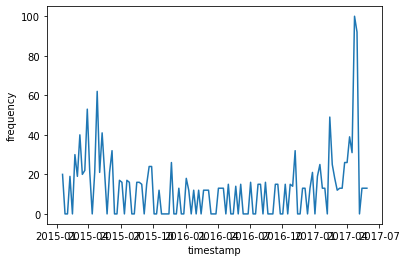

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# data_fn_houston = data_fn[data_fn['geo_code'] == 'US-TX-618']
sns.lineplot(x = data_fn_houston.timestamp, y = data_fn_houston.frequency);

# Visualizing Search Term Popularity by show and city

In [8]:
from project_functions import popularity_graph

In [9]:
#merged_stops_data.to_csv('data/merged_stops_data.csv')

In [10]:
scraped_data.timestamp = column_to_datetime(scraped_data.timestamp)

In [500]:
scraped_data.timestamp

0        2011-01-01
1        2011-02-01
2        2011-03-01
3        2011-04-01
4        2011-05-01
            ...    
577532   2019-12-01
577533   2019-12-08
577534   2019-12-15
577535   2019-12-22
577536   2019-12-29
Name: timestamp, Length: 571020, dtype: datetime64[ns]

In [11]:
extract_frequencies('wicked (tour: emerald city)', 'US-TX-765')

/Users/nickwilders/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,timestamp,frequency,isPartial,search_term,geo_code
0,229540,229540,229540,229540,229540.0,2004-01-01,0,False,wicked (tour: emerald city),US-TX-765
1,229541,229541,229541,229541,229541.0,2004-02-01,0,False,wicked (tour: emerald city),US-TX-765
2,229542,229542,229542,229542,229542.0,2004-03-01,0,False,wicked (tour: emerald city),US-TX-765
3,229543,229543,229543,229543,229543.0,2004-04-01,0,False,wicked (tour: emerald city),US-TX-765
4,229544,229544,229544,229544,229544.0,2004-05-01,0,False,wicked (tour: emerald city),US-TX-765
...,...,...,...,...,...,...,...,...,...,...
94,229634,229634,229634,229634,229634.0,2011-11-01,29,False,wicked (tour: emerald city),US-TX-765
95,229635,229635,229635,229635,229635.0,2011-12-01,27,False,wicked (tour: emerald city),US-TX-765
96,229636,229636,229636,229636,229636.0,2012-01-01,42,False,wicked (tour: emerald city),US-TX-765
97,229637,229637,229637,229637,229637.0,2012-02-01,100,False,wicked (tour: emerald city),US-TX-765


/Users/nickwilders/Desktop/METIS/metis_classwork/project5/project_functions.py:326: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_showstop = merged_stops_data[merged_stops_data['title'] == no_parentheses_show][merged_stops_data['full_code'] == geotag]
/Users/nickwilders/Desktop/METIS/metis_classwork/project5/project_functions.py:329: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_showstop = merged_stops_data[merged_stops_data['tour_descript'] == show][merged_stops_data['full_code'] == geotag]
/Users/nickwilders/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


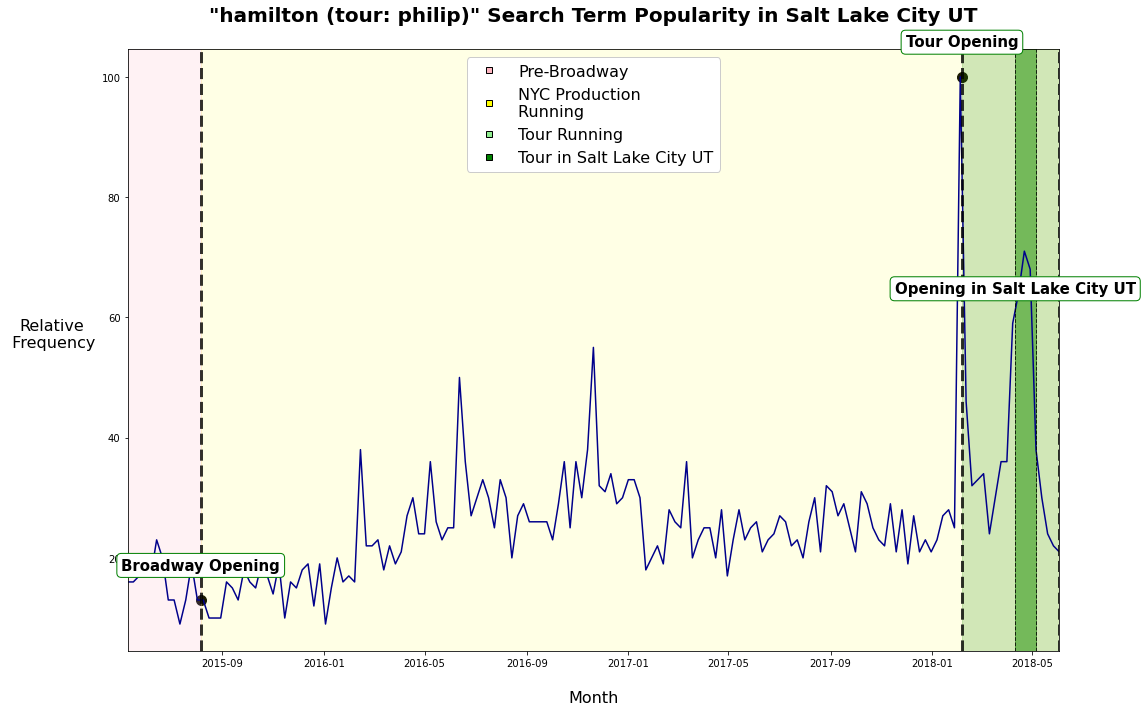

In [12]:
popularity_graph('hamilton (tour: philip)', 'US-NV-770')

In [352]:
show = 'Bridges of Madison County'
geotag = 'US-TX-618'

if show[-1:] == ')':
    no_parentheses_show = show[:-7]
else:
    no_parentheses_show = show

df_showstop = merged_stops_data[merged_stops_data['title'] == no_parentheses_show][merged_stops_data['full_code'] == geotag]
df_showstop

show_title = df_showstop.title.iloc[0]
full_title = df_showstop.tour_descript.iloc[0]
nyc_opening = df_showstop.opening_date_nyc.iloc[0]
nyc_closing = df_showstop.closing_date_nyc.iloc[0]
tour_opening = df_showstop.tour_opening.iloc[0][:10]


tour_venue_opening = df_showstop.city_opening_date.iloc[0]
tour_venue_closing = df_showstop.city_closing_date.iloc[0]
location_tag = geotag
location_name = list_of_cities[list_of_cities.full_code == geotag].metro_area_name
if len(location_name)>1:
    location_name = location_name.iloc[0]

interest_over_time_df = extract_frequencies(show, geotag)

try:
    tour_closing = df_showstop.tour_closing.iloc[0][:10]
except: 
    tour_closing = interest_over_time_df.timestamp.iloc[-1]
    
try:
    nyc_closing = df_showstop.closing_date_nyc.iloc[0]
except: 
    nyc_closing = interest_over_time_df.timestamp.iloc[-1]
    

<ipython-input-352-86e4cc9ff195>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_showstop = merged_stops_data[merged_stops_data['title'] == no_parentheses_show][merged_stops_data['full_code'] == geotag]


# Model Development

## Imports

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

%matplotlib inline

## Data Cleaning / Exploration

In [292]:
# Import of FULL range of data values
full_engagement_table = pd.read_csv('data/full_engagement_table_3.csv')
full_engagement_table['state'] = [x[3:5] for x in full_engagement_table.geo_code]

# Import of data values with no 0 or 100
engagement_no_max_min = pd.read_csv('data/engagement_no_max_min.csv')

# Import of geographical state regions
state_regions = pd.read_csv('data/state_regions.csv')
state_regions.columns = ['full_state', 'state', 'region', 'division']

relative_interest = pd.read_csv('data/relative_interest_2004_to_present.csv')
relative_interest = relative_interest.reset_index()
relative_interest.columns = ['full_state', 'relative_frequency']

In [293]:
engagement_no_max_min = full_engagement_table[full_engagement_table.in_town_engagement < 100][full_engagement_table.in_town_engagement > 0]
len(engagement_no_max_min)

engagement_no_max_min = engagement_no_max_min.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

<ipython-input-293-083295bda86c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  engagement_no_max_min = full_engagement_table[full_engagement_table.in_town_engagement < 100][full_engagement_table.in_town_engagement > 0]


In [294]:
us_engagement = pd.merge(engagement_no_max_min, state_regions, on='state', how='inner')
us_engagement = us_engagement.dropna()

us_engagement = pd.merge(us_engagement, relative_interest, on='full_state', how='inner')
us_engagement.relative_frequency = us_engagement.relative_frequency.astype('int64')

us_engagement = us_engagement[us_engagement.static_engagement_min != np.inf]
# us_engagement = us_engagement[us_engagement.static_engagement_max!=100]

In [295]:
static_hits_100_list = []

for value in us_engagement.static_engagement_max:
    if value == 100.0:
        static_hits_100_list.append(1)
    else:
        static_hits_100_list.append(0)

In [296]:
us_engagement['static_hits_100'] = static_hits_100_list

In [297]:
df = us_engagement.groupby('state').mean()
df = df.sort_values(by = 'relative_frequency', ascending=False)

In [298]:
merged_stops_data = pd.read_csv('data/merged_stops_data.csv')
merged_stops_data.tour_opening

0       2012-12-11 00:00:00
1       2012-12-11 00:00:00
2       2012-12-11 00:00:00
3       2012-12-11 00:00:00
4       2012-12-11 00:00:00
               ...         
4786    2011-07-09 00:00:00
4787    2011-07-09 00:00:00
4788    2011-07-09 00:00:00
4789    2011-07-09 00:00:00
4790    2007-02-10 00:00:00
Name: tour_opening, Length: 4791, dtype: object

In [299]:
us_engagement.to_csv('data/us_engagement.csv')

In [300]:
us_engagement = pd.read_csv('data/us_engagement_2_120220.csv')

In [205]:
us_engagement.corr()

,Unnamed: 0,Unnamed: 0_x,Unnamed: 0.1.1,Unnamed: 0.1.1.1,nyc_opening_engagement,event_engagement,static_engagement,static_engagement_min,static_engagement_max,static_hits_zero,tour_open_engagement,in_town_engagement,relative_frequency,static_hits_100,Unnamed: 0_y,theatre_near_me,shows_near_me
Unnamed: 0,1.000000,0.998093,0.088625,NaN,-0.080726,-0.077685,-0.062773,-0.002800,0.127805,0.074208,-0.114435,-0.066964,0.079270,0.124255,0.186527,-0.337162,0.089632
Unnamed: 0_x,0.998093,1.000000,0.116883,NaN,-0.076971,-0.074305,-0.060200,-0.008450,0.125628,0.070942,-0.111636,-0.064154,0.078858,0.123128,0.182508,-0.328946,0.087504
Unnamed: 0.1.1,0.088625,0.116883,1.000000,NaN,0.011066,0.038646,-0.009326,-0.101048,0.110559,0.070685,-0.062034,-0.057378,-0.022163,0.082826,0.018513,-0.025057,0.030447
Unnamed: 0.1.1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nyc_opening_engagement,-0.080726,-0.076971,0.011066,NaN,1.000000,0.644720,0.540667,0.047740,0.056700,-0.306419,0.462783,0.149715,-0.001641,-0.031524,-0.001239,0.058601,-0.018660
event_engagement,-0.077685,-0.074305,0.038646,NaN,0.644720,1.000000,0.852028,0.080273,0.104333,-0.509946,0.734431,0.214377,0.001194,-0.037498,-0.022159,0.076151,-0.015678
static_engagement,-0.062773,-0.060200,-0.009326,NaN,0.540667,0.852028,1.000000,0.139436,0.254651,-0.652625,0.880678,0.256950,-0.009192,0.150115,-0.035157,0.075435,-0.011513
static_engagement_min,-0.002800,-0.008450,-0.101048,NaN,0.047740,0.080273,0.139436,1.000000,0.133695,-0.039668,0.178733,0.251262,0.004526,-0.011334,-0.039751,-0.017276,0.036708
static_engagement_max,0.127805,0.125628,0.110559,NaN,0.056700,0.104333,0.254651,0.133695,1.000000,-0.105665,0.192048,-0.280596,-0.048220,0.760968,0.096433,-0.142897,0.082032
static_hits_zero,0.074208,0.070942,0.070685,NaN,-0.306419,-0.509946,-0.652625,-0.039668,-0.105665,1.000000,-0.591177,-0.182880,0.011172,-0.082399,0.032173,-0.110197,0.024754


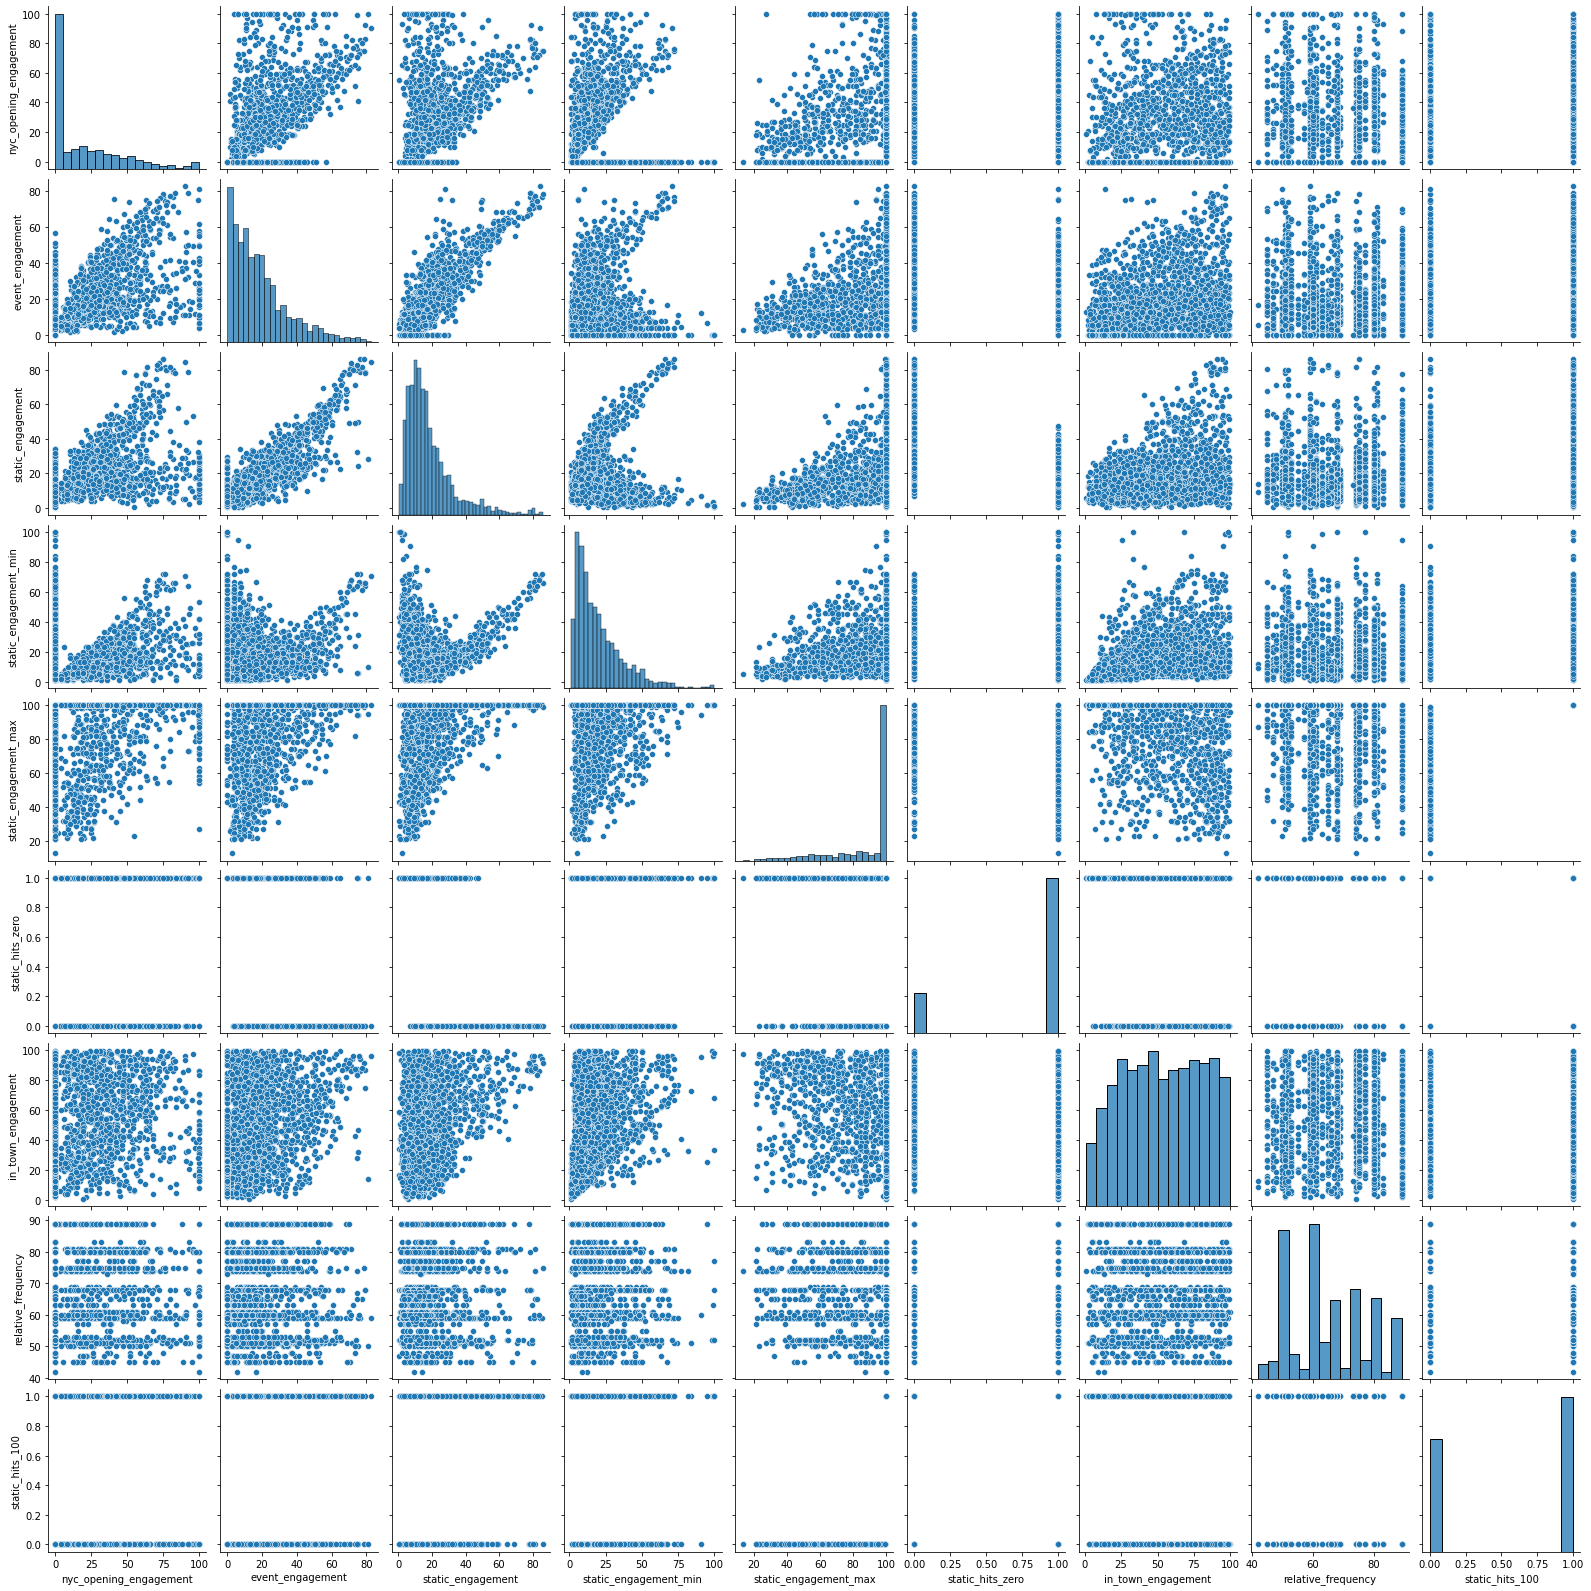

In [361]:
sns.pairplot(us_engagement)

In [209]:
us_engagement.corr(method='pearson')

,Unnamed: 0,Unnamed: 0_x,Unnamed: 0.1.1,Unnamed: 0.1.1.1,nyc_opening_engagement,event_engagement,static_engagement,static_engagement_min,static_engagement_max,static_hits_zero,tour_open_engagement,in_town_engagement,relative_frequency,static_hits_100,Unnamed: 0_y,theatre_near_me,shows_near_me
Unnamed: 0,1.000000,0.998093,0.088625,NaN,-0.080726,-0.077685,-0.062773,-0.002800,0.127805,0.074208,-0.114435,-0.066964,0.079270,0.124255,0.186527,-0.337162,0.089632
Unnamed: 0_x,0.998093,1.000000,0.116883,NaN,-0.076971,-0.074305,-0.060200,-0.008450,0.125628,0.070942,-0.111636,-0.064154,0.078858,0.123128,0.182508,-0.328946,0.087504
Unnamed: 0.1.1,0.088625,0.116883,1.000000,NaN,0.011066,0.038646,-0.009326,-0.101048,0.110559,0.070685,-0.062034,-0.057378,-0.022163,0.082826,0.018513,-0.025057,0.030447
Unnamed: 0.1.1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nyc_opening_engagement,-0.080726,-0.076971,0.011066,NaN,1.000000,0.644720,0.540667,0.047740,0.056700,-0.306419,0.462783,0.149715,-0.001641,-0.031524,-0.001239,0.058601,-0.018660
event_engagement,-0.077685,-0.074305,0.038646,NaN,0.644720,1.000000,0.852028,0.080273,0.104333,-0.509946,0.734431,0.214377,0.001194,-0.037498,-0.022159,0.076151,-0.015678
static_engagement,-0.062773,-0.060200,-0.009326,NaN,0.540667,0.852028,1.000000,0.139436,0.254651,-0.652625,0.880678,0.256950,-0.009192,0.150115,-0.035157,0.075435,-0.011513
static_engagement_min,-0.002800,-0.008450,-0.101048,NaN,0.047740,0.080273,0.139436,1.000000,0.133695,-0.039668,0.178733,0.251262,0.004526,-0.011334,-0.039751,-0.017276,0.036708
static_engagement_max,0.127805,0.125628,0.110559,NaN,0.056700,0.104333,0.254651,0.133695,1.000000,-0.105665,0.192048,-0.280596,-0.048220,0.760968,0.096433,-0.142897,0.082032
static_hits_zero,0.074208,0.070942,0.070685,NaN,-0.306419,-0.509946,-0.652625,-0.039668,-0.105665,1.000000,-0.591177,-0.182880,0.011172,-0.082399,0.032173,-0.110197,0.024754


In [151]:
us_engagement.to_csv('data/us_engagement.csv')

## Set X and y train, test, val

In [303]:
us_engagement = pd.read_csv('data/us_engagement_120320.csv')

In [306]:
us_engagement.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0_x', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1'], inplace=True)

In [307]:
us_engagement.corr()

,nyc_opening_engagement,event_engagement,static_engagement,static_engagement_min,static_engagement_max,static_hits_zero,tour_open_engagement,in_town_engagement,relative_frequency,static_hits_100,Unnamed: 0_y,theatre_near_me,shows_near_me,tony_winner
nyc_opening_engagement,1.000000,0.644720,0.540667,0.047740,0.056700,-0.306419,0.462783,0.149715,-0.001641,-0.031524,-0.001239,0.058601,-0.018660,0.013303
event_engagement,0.644720,1.000000,0.852028,0.080273,0.104333,-0.509946,0.734431,0.214377,0.001194,-0.037498,-0.022159,0.076151,-0.015678,0.053565
static_engagement,0.540667,0.852028,1.000000,0.139436,0.254651,-0.652625,0.880678,0.256950,-0.009192,0.150115,-0.035157,0.075435,-0.011513,0.105198
static_engagement_min,0.047740,0.080273,0.139436,1.000000,0.133695,-0.039668,0.178733,0.251262,0.004526,-0.011334,-0.039751,-0.017276,0.036708,-0.119958
static_engagement_max,0.056700,0.104333,0.254651,0.133695,1.000000,-0.105665,0.192048,-0.280596,-0.048220,0.760968,0.096433,-0.142897,0.082032,0.105958
static_hits_zero,-0.306419,-0.509946,-0.652625,-0.039668,-0.105665,1.000000,-0.591177,-0.182880,0.011172,-0.082399,0.032173,-0.110197,0.024754,-0.011510
tour_open_engagement,0.462783,0.734431,0.880678,0.178733,0.192048,-0.591177,1.000000,0.311678,-0.022420,0.096453,-0.038617,0.119220,-0.024644,0.038133
in_town_engagement,0.149715,0.214377,0.256950,0.251262,-0.280596,-0.182880,0.311678,1.000000,0.035081,-0.288674,-0.090515,0.124962,0.014531,-0.149926
relative_frequency,-0.001641,0.001194,-0.009192,0.004526,-0.048220,0.011172,-0.022420,0.035081,1.000000,-0.049013,-0.119094,-0.098141,0.133307,-0.012058
static_hits_100,-0.031524,-0.037498,0.150115,-0.011334,0.760968,-0.082399,0.096453,-0.288674,-0.049013,1.000000,0.073005,-0.122791,0.060458,0.094464


In [308]:
# Set X and y variables

X = us_engagement[['nyc_opening_engagement', 'event_engagement', 'static_engagement', 'static_engagement_min', 
                   'static_engagement_max', 'static_hits_zero', 'static_hits_100', 'relative_frequency', 
                  'theatre_near_me', 'shows_near_me', 'tour_open_engagement', 'tony_winner']]
y = us_engagement[['in_town_engagement']]

In [309]:
from sklearn import preprocessing
scaled_X = preprocessing.scale(X)
normalized_X = preprocessing.normalize(X)

In [310]:
# Set train_test_split values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2,random_state=1)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2,random_state=1)
X_test_scaled, X_val_scaled, y_test, y_val = train_test_split(X_test_scaled, y_test, test_size=0.2,random_state=1)

''

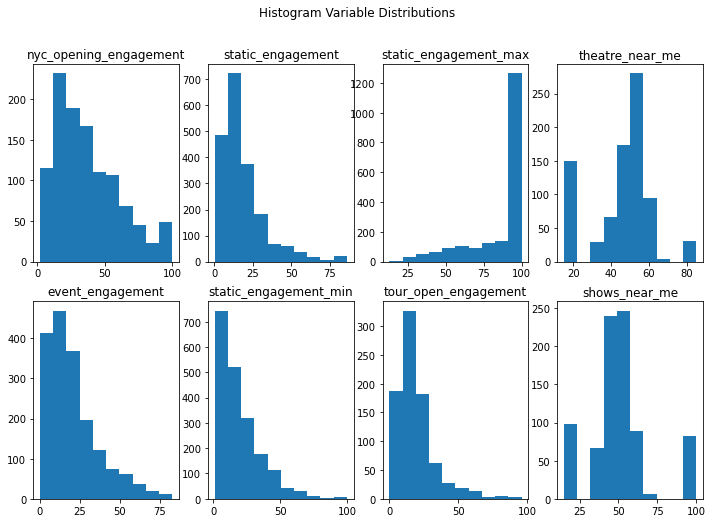

In [239]:
fig,axs = plt.subplots(2, 4, figsize=(12,8))
fig.suptitle('Histogram Variable Distributions')

axs[0,0].hist(us_engagement['nyc_opening_engagement'][us_engagement['nyc_opening_engagement'] > 0])
axs[0,0].set_title('nyc_opening_engagement')

axs[1,0].hist(us_engagement['event_engagement'][us_engagement['event_engagement'] > 0])
axs[1,0].set_title('event_engagement')

axs[0,1].hist(us_engagement['static_engagement'])
axs[0,1].set_title('static_engagement')

axs[1,1].hist(us_engagement['static_engagement_min'][us_engagement['static_engagement_min'] > 0])
axs[1,1].set_title('static_engagement_min')

axs[0,2].hist(us_engagement['static_engagement_max'][us_engagement['static_engagement_max'] > 0])
axs[0,2].set_title('static_engagement_max')

axs[1,2].hist(us_engagement['tour_open_engagement'][us_engagement['static_engagement_max'] < 100])
axs[1,2].set_title('tour_open_engagement')

axs[0,3].hist(us_engagement['theatre_near_me'][us_engagement['static_engagement_max'] < 100])
axs[0,3].set_title('theatre_near_me')

axs[1,3].hist(us_engagement['shows_near_me'][us_engagement['static_engagement_max'] < 100])
axs[1,3].set_title('shows_near_me')

;

In [348]:
# Set train_test_split values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2,random_state=1)

normal_X_train, normal_X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.2,random_state=1)
normal_X_test, normal_X_val, y_test, y_val = train_test_split(normal_X_test, y_test, test_size=0.2,random_state=1)

## Linear Regression Baseline Model

In [311]:
X.columns

Index(['nyc_opening_engagement', 'event_engagement', 'static_engagement',
       'static_engagement_min', 'static_engagement_max', 'static_hits_zero',
       'static_hits_100', 'relative_frequency', 'theatre_near_me',
       'shows_near_me', 'tour_open_engagement', 'tony_winner'],
      dtype='object')

### Non-Scaled Benchmark

In [312]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.3356852327283165

### Normalized Data Benchmark

In [315]:
lr = LinearRegression()
lr.fit(normal_X_train, y_train)
lr.score(normal_X_test, y_test)

0.34995489145406866

In [317]:
m = LassoCV()
p = PolynomialFeatures(degree=2)

X_train_poly = p.fit_transform(X_train)
X_test_poly = p.fit_transform(X_test)

#s = StandardScaler(with_mean=False)

#X_test_poly_scaled = s.fit_transform(X_test_poly)
model = m.fit(X_train_poly,y_train)
model.score(X_test_poly,y_test)

/Users/nickwilders/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/nickwilders/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87.83826381480321, tolerance: 86.74967917931497
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nickwilders/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87.53989375045057, tolerance: 86.74967917931497
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nickwilders/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordin

0.39006564257184306

## Random Forest Regressor Model

In [318]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler


### HYPERTUNING

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [319]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 50, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

from pprint import pprint
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


##### Fit to non-scaled data

In [326]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)



Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 15.7min finished
/Users/nickwilders/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 5, 10, 15, 20, 25, 30,
                                                      35, 40, 45, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

##### Fit to scaled data

In [226]:
# Represents best parameters for 9 features (new "tour_open_engagement" variable)

rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [169]:
# Represents best parameters for 8 features (new search data)

rf_random_scaled.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 35,
 'bootstrap': True}

In [106]:
# Represents best parameters for 6 features (no new search data)

rf_random_scaled.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

##### Evaluation Function (maybe do not use)

In [289]:
def evaluate(model_name, model, test_features, test_labels):
    import numpy as np
    
    length = len(test_labels)
    
    predictions = model.predict(test_features)
    errors = abs(np.subtract(predictions,np.asarray(test_labels).reshape(1,length)))

    mape = 100 * np.mean(errors.reshape(length,1) / test_labels)
    accuracy = 100 - mape
    accuracy = accuracy.values[0]
    print(f'{model_name} Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.\n'.format(accuracy))
    
    return accuracy

### Evaluation with RMSE

#### Base RF Model

In [349]:
from sklearn.metrics import mean_squared_error

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('The base RMSE is ' + str(rmse))

The base RMSE is 20.86800722752953


<ipython-input-349-e38f8f463e2d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  base_model.fit(X_train, y_train)


#### Optimized RF Model

In [422]:
y_pred = rf_random.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
print('The paramater-tuned RMSE for the training set is ' + str(rmse))

The paramater-tuned RMSE for the training set is 10.153560918703525


In [423]:
y_pred = rf_random.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('The paramater-tuned RMSE for the testing set is ' + str(rmse))

The paramater-tuned RMSE for the testing set is 20.20212223464248


In [424]:
y_val_pred = rf_random.predict(X_val)

mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
print('The paramater-tuned RMSE for the validation set is ' + str(rmse))

The paramater-tuned RMSE for the validation set is 20.6800391498345


#### Test Set, against base_model RF Regressor - run each time for new variables

In [290]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate('Base Model', base_model, X_test, y_test)

#random_accuracy = evaluate('Best Fit Model', best_random, X_test, y_test)
#print('Non-scaled holds improvement of {:0.2f}%.\n\n'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

best_random = rf_random.best_estimator_
random_accuracy = evaluate('Best Fit Model', best_random, X_test, y_test)

print('Optimized model holds improvement of {:0.2f}%.'.format( 100 * (random_accuracy_scaled - base_accuracy) / base_accuracy))


<ipython-input-290-d2e6781c898c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  base_model.fit(X_train, y_train)


Base Model Performance
Average Error: 16.9681.
Accuracy = 36.56%.

Best Fit Model Performance
Average Error: 16.7244.
Accuracy = 34.42%.

Optimized model holds improvement of -105.89%.


#### Evaluation Set, against base_model RF Regressor - run each time for new variables

In [176]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate('Base Model', base_model, X_val, y_val)


best_random_scaled = rf_random_scaled.best_estimator_
random_accuracy = evaluate('Best Fit Model', best_random_scaled, X_val_scaled, y_val)


print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))



Base Model Performance
Average Error: 16.6349.
Accuracy = 36.95%.

Best Fit Model Performance
Average Error: 17.4919.
Accuracy = 31.72%.

Improvement of -14.17%.


<ipython-input-176-2514334cae0a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  base_model.fit(X_train, y_train)


## Bayesian Regression Model

### Pip install and import

In [111]:
! pip install pymc3

import pymc3 as pm

     |████████████████████████████████| 1.9 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 736 kB 6.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 295 kB 4.3 MB/s eta 0:00:01
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668095 sha256=a7833088eae327b29c530a6ebb9566f0651cd8ce598db230df8d1973ccaa4492
  Stored in directory: /Users/nickwilders/Library/Caches/pip/wheels/84/cb/19/235b5b10d89b4621f685112f8762681570a9fa14dc1ce904d9
Successfully built theano


### Model Development

In [124]:
linear_model

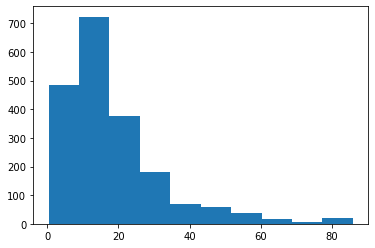

In [247]:
plt.hist(us_engagement.static_engagement);

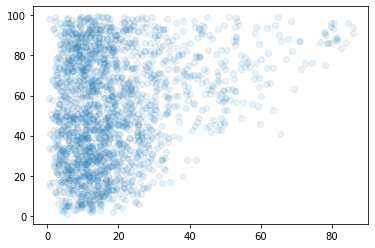

In [258]:
us_engagement[['static_engagement', 'in_town_engagement']].head(50)
plt.scatter(us_engagement.static_engagement, us_engagement.in_town_engagement, alpha=.1)

In [ ]:
# Without normalizing the data, failed around 25%

In [284]:
text_X.unique()

array([11.75      , 22.41666667,  5.98      , 19.4742268 , 12.29545455,
       46.64347826,  8.41772152, 21.72427984,  5.71212121,  8.        ,
       84.57024793, 35.85057471, 13.13170732, 20.14457831, 16.05813953,
       21.17894737, 19.03125   , 38.40625   , 16.85074627, 14.6       ,
       19.25806452, 10.93181818, 14.70588235, 19.72222222, 11.63855422,
       47.25333333, 85.82926829, 47.97826087, 48.77692308,  8.4789916 ,
       13.05128205,  9.46666667, 20.77678571,  4.07692308, 18.42083333,
       17.06493506,  9.60952381, 25.45454545, 21.47368421, 51.35714286,
        6.75409836, 16.74909091, 14.70967742,  7.87850467, 10.078125  ,
       10.20792079, 45.46902655,  6.91666667, 18.11940299, 12.04651163,
       15.27333333, 23.42990654, 28.66101695, 19.07857143,  7.25688073,
       11.52238806, 10.0754717 , 22.40944882, 18.51724138, 19.37068966,
       22.15789474, 32.34705882, 11.08955224,  8.18811881,  9.8952381 ,
       63.42201835, 18.91780822, 14.10752688,  7.3047619 ,  8.9 

In [282]:
test_X = us_engagement.static_engagement[:100]
test_y = us_engagement.in_town_engagement[:100]

In [285]:
with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0, sd = 10)
    
    # Slope 
    slope = pm.Normal('slope', mu = 0, sd = 10)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 10)
    
    # Estimate of mean
    normalized_static_engagement = [x[2] for x in normalized_X]
    mean = intercept + slope * test_X
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = test_y.values)
    
    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(500, step)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, slope, Intercept]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 17 seconds.
The acceptance probability does not match the target. It is 0.8800120207006091, but should be close to 0.8. Try to increase the number of tuning steps.


/Users/nickwilders/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


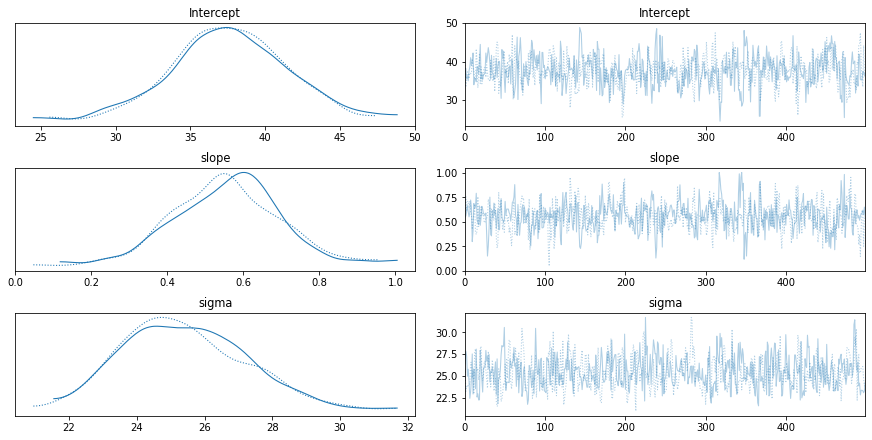

In [286]:
pm.traceplot(linear_trace);

In [270]:
linear_trace[0]

{'Intercept': 53.38408225156956,
 'sigma_log__': 3.308561097932333,
 'sigma': 27.345749294263918}

In [271]:
y.mean()

in_town_engagement    53.468408
dtype: float64

### 11/3 Stuff

In [390]:
us_engagment = pd.read_csv('data/us_engagement_120320.csv')

In [392]:
us_engagement.state.value_counts().to_csv('data/amount_of_stops_per_state.csv')

In [391]:
us_engagement[us_engagement.metro_area_name == 'Salt Lake City UT'].state 

1813    UT
1814    UT
1815    UT
1816    UT
1817    UT
1818    UT
1819    UT
1820    UT
1821    UT
1822    UT
1823    UT
1824    UT
1825    UT
1826    UT
1827    UT
1828    UT
1829    UT
Name: state, dtype: object

In [384]:
us_engagement.state = [x[-2:] for x in us_engagement.metro_area_name]

In [419]:
table = us_engagement.groupby(['metro_area_name', 'state']).mean().reset_index()
table.state.value_counts()

TX    11
CA     8
NY     8
OH     7
FL     7
PA     5
IL     5
IN     5
GA     4
MI     4
MT     4
NC     4
TN     4
WI     4
WA     3
VA     3
AL     3
MO     3
IA     3
re     2
LA     2
KS     2
NE     2
MN     2
ID     2
OR     2
AR     2
SD     2
OK     2
CO     2
MS     2
SC     2
NV     2
KY     2
AZ     2
ND     2
D)     1
MD     1
rk     1
es     1
ut     1
C,     1
NM     1
NH     1
ME     1
ey     1
AK     1
MA     1
WV     1
WY     1
CT     1
ri     1
UT     1
Name: state, dtype: int64

In [399]:
us_engagement.state.value_counts().head(20)

CA    192
TX    160
FL    150
OH    141
PA    102
MO     73
NC     72
IL     69
MI     66
NY     66
D)     59
NH     56
CO     53
WA     52
WI     50
TN     48
AZ     46
GA     39
CT     38
MN     35
Name: state, dtype: int64

In [421]:
us_engagement.groupby('state').mean()

,nyc_opening_engagement,event_engagement,static_engagement,static_engagement_min,static_engagement_max,static_hits_zero,tour_open_engagement,in_town_engagement,relative_frequency,static_hits_100,Unnamed: 0_y,theatre_near_me,shows_near_me,tony_winner
state,,,,,,,,,,,,,,
AK,50.000000,11.083333,11.609242,10.500000,93.500000,1.000000,11.107015,11.000000,42.000000,0.500000,185.000000,15.000000,15.000000,0.500000
AL,11.636364,9.062260,13.140476,21.636364,85.636364,1.000000,13.107628,45.454545,47.000000,0.545455,92.000000,15.000000,22.727273,0.636364
AR,10.888889,16.735812,17.151350,25.666667,94.833333,0.888889,20.017355,50.388889,55.000000,0.777778,31.500000,15.000000,100.000000,0.500000
AZ,24.456522,22.342674,20.936596,25.152174,91.826087,0.760870,23.491600,61.880435,52.000000,0.673913,88.521739,39.130435,36.521739,0.478261
"C,",6.956522,10.978398,13.519936,18.869565,90.260870,0.826087,15.824432,52.543478,50.000000,0.782609,NaN,15.000000,15.000000,0.565217
CA,22.588542,19.763907,19.995882,18.031250,84.255208,0.723958,25.413652,52.621643,59.000000,0.520833,80.625000,51.432292,48.645833,0.453125
CO,16.226415,14.877760,16.625007,16.622642,75.943396,0.792453,19.908381,63.311950,65.000000,0.415094,0.018868,84.943396,15.056604,0.415094
CT,38.921053,26.862999,22.987229,20.000000,88.868421,0.842105,26.707411,49.618421,80.000000,0.500000,87.000000,43.000000,57.000000,0.394737
D),24.898305,21.341374,18.762446,12.915254,76.322034,0.728814,20.272571,54.678692,58.728814,0.423729,83.000000,48.000000,52.000000,0.440678


In [406]:
150/len(us_engagement)

0.07602635580334516

# Model Test with Live Data

In [ ]:
y_pred = rf_random.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
print('The paramater-tuned RMSE for the training set is ' + str(rmse))

In [425]:
from project_functions import engagement_table

In [564]:
def interest_in_past_year(show_title, location_tag):
    
    show_title = [show_title]
    
    import datetime
    from pytrends.request import TrendReq
    pytrend = TrendReq(timeout=None)
    
    # set starting point and ending point to one year ago and today, respectively 

    starting_point_dt = datetime.datetime.now() - datetime.timedelta(days=365)
    ending_point_dt = datetime.datetime.now()

    starting_point = starting_point_dt.strftime('%Y-%m-%d')
    ending_point = ending_point_dt.strftime('%Y-%m-%d')
    
    try:
        pytrend.build_payload(kw_list=show_title, timeframe=f'{starting_point} {ending_point}', geo=f'{location_tag}')
        # set to table
        interest_over_time_df = pytrend.interest_over_time()    
    except:
        interest_over_time_df = pd.DataFrame(data={'frequency': ['collection error'], 
                                                 'isPartial': ['collection error']})        

    # rename columns for graphing ease - also debug and if there were no search values returned, list an error
    interest_over_time_df.columns = [ 'frequency', 'isPartial']    
    
    # add search_term and geo_code for later reference
    interest_over_time_df['search_term'] = show_title[0]
    interest_over_time_df['geo_code'] = location_tag

    return interest_over_time_df

In [565]:
df.head(4)

,frequency,isPartial,search_term,geo_code
date,,,,
2019-12-08,78,False,mean girls,US
2019-12-15,71,False,mean girls,US
2019-12-22,72,False,mean girls,US
2019-12-29,76,False,mean girls,US


In [586]:
def year_interest_graph(table):
    
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    table = table.reset_index()
    search_term = table.search_term[0]
    geotag = table.geo_code[0]
    list_of_cities = pd.read_csv('data/list_of_cities.csv')
    
    try:
        location_name = list_of_cities[list_of_cities.full_code == geotag].metro_area_name.iloc[0]
    except:
        location_name = 'unknown location'

    fig, ax = plt.subplots(figsize=(10,6))

    ax = sns.lineplot(data = table, x = 'date', y = 'frequency', color = 'red', linewidth=4)
    sns.set_theme(style='whitegrid', font='Helvetica')
    ax.grid(False)

    ax.set_title(f'"{search_term}" Relative Search Volume in {location_name} \n',fontsize=20)
    ax.set_xlabel('\nDate', fontsize=14)
    #ax.set_xticklabels(['2020-10-01','','','','','2020-10-08','','','','','2020-10-15','','','','','2020-10-22','','','','','2020-11-01','','','','','2020-11-08','',''], fontsize=12)
    ax.set_yticklabels(['', '0%', '20%', '40%', '60%', '80%', '100%'], fontsize=12)
    ax.set_ylabel('Relative Search\nVolume\n', fontsize=14, rotation = 0, labelpad=60)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.tight_layout()

    # plt.savefig(f'images/Alex_SPOM_volume')


In [587]:
def graph_from_search_term(search_term, geo_tag):
    df = interest_in_past_year(search_term, geo_tag)
    year_interest_graph(df)

<ipython-input-586-29e98d021a55>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', '0%', '20%', '40%', '60%', '80%', '100%'], fontsize=12)


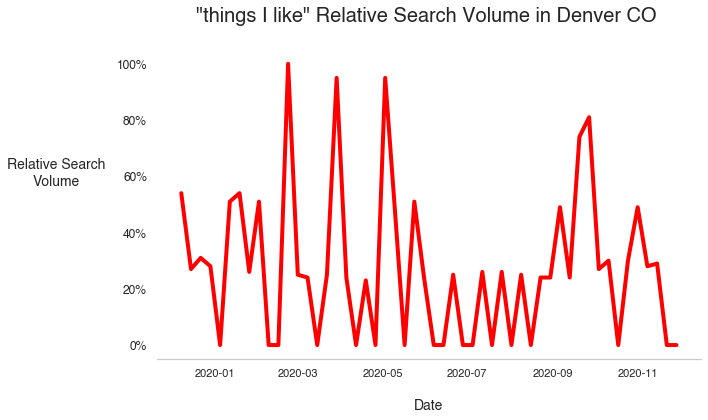

In [588]:
graph_from_search_term('things I like', 'US-CO-751')

In [472]:
df = interest_in_past_year('mean girls')

In [456]:
starting_point_dt = datetime.datetime.now() - datetime.timedelta(days=365)
ending_point_dt = datetime.datetime.now()

starting_point = starting_point_dt.strftime('%Y-%m-%d')
ending_point = ending_point_dt.strftime('%Y-%m-%d')

In [461]:
timeframe=f'{starting_point} {ending_point}'
timeframe

'2019-12-05 2020-12-04'

In [463]:
show_title[0]

'Mean Girls Musical'

In [458]:
ending_point

'2020-12-04'

In [451]:
import pandas as pd
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta
from pytrends.request import TrendReq
import datetime as datetime

# Test values are for Mean Girls' performance in Cleveland
show_title = ['Mean Girls Musical']
nyc_opening = '2018-04-08'
nyc_closing = 'N/A'
tour_opening = '2019-09-21'
tour_venue_opening = '2019-12-03'
tour_venue_closing = '2019-12-22' 
location_tag = 'US-OH-510'

# convert opening night value to datetime and go back three months in time
# code found at https://www.programiz.com/python-programming/datetime/strftime
datetime_opening = dt.strptime(nyc_opening, '%Y-%m-%d')
# set relative time delta
three_mon_rel = relativedelta(months=-3)
# Back in time! 
starting_point_dt = datetime_opening + three_mon_rel
# Reset date to string
starting_point = starting_point_dt.strftime('%Y-%m-%d')

# Repeat process for, add one date to end of closing
datetime_closing = dt.strptime(tour_venue_closing, '%Y-%m-%d')
one_mon_rel = relativedelta(months=1)
ending_point_dt = datetime_closing + one_mon_rel
ending_point = ending_point_dt.strftime('%Y-%m-%d')

# Search for term in geographic area
pytrend.build_payload(kw_list=show_title, timeframe=f'{starting_point} {ending_point}', geo=f'{location_tag}')
# set to table
interest_over_time_df = pytrend.interest_over_time()

# rename columns for graphing ease
interest_over_time_df.columns = [ 'frequency', 'isPartial']

# add search_term and geo_code for later reference
interest_over_time_df['search_term'] = show_title[0]
interest_over_time_df['geo_code'] = location_tag

In [454]:
interest_over_time_df.frequency.unique()

array([  0,  73,  82,  42,  39,  38,  41,  40,  33,  77,  36,  37,  35,
       100,  69])